# Jordan Notebook - Exploratory Data Analysis

- Author: [Jordan](https://github.com/JfromNWMS/)
- Repository: [datafun-04-eda](https://github.com/JfromNWMS/datafun-04-eda)

## Section 1. Imports
Hello, I'm Jordan.  Today, I'll be your guide in exploring the iris data set. We begin by importing some modules that will aid in data manipulation and presentation.

In [1230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import stats_jordan
import ipywidgets as widgets
from IPython.display import display

## Section 2. Load Data
Let's go ahead and load our data into a pandas dataframe and look at the head of our dataframe.

In [1231]:
iris_df: pd.DataFrame = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Section 3. Initial Data Inspection
With the use of pandas .info() method for a pandas dataframe we can gain some additional information about our dataframe.

In [1232]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Inspection reveals four numerical columns and one categorical column all with 150 entries each with no null values.

## Section 4. Initial Descriptive Statistics
After we define a formating function for our summary, we can now use pandas .describe() method for dataframes to retrieve the summary statistics for all numerical columns.

In [1233]:
format_dict: dict = {
    'count': '{:.0f}'.format,
    'min': '{:.1f}'.format,
    'max': '{:.1f}'.format,
    'std': '{:.3f}'.format,
    'default': '{:.2f}'.format
}

def format_describe(df_data: pd.DataFrame) -> pd.DataFrame:
    return df_data.apply(lambda row: row.map(format_dict.get(row.name, format_dict['default'])), axis=1)

format_describe(iris_df.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,150,150,150,150
mean,5.84,3.06,3.76,1.20
std,0.828,0.436,1.765,0.762
min,4.3,2.0,1.0,0.1
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.9,4.4,6.9,2.5


Summary statistics show all numerical data points lay on or between 0.1 and 7.9.  The means of sepal width and petal length are relatively close at 3.06 and 3.76 respectively.  Sepal length has the highest mean of the four numerical attributes  and petal width the lowest with means of 5.84 and 1.20 respectively.

## Section 5.  Initial Data Distribution for Numerical Columns
A great way to get an idea about the distribution of numerical data is to look at a histogram, so let's take an overall look at our data by looking at the numeric column data over all categories while being able to adjust our bin size.

In [1234]:
iris_plot_df = iris_df.copy()

def plot_hist(bins: int) -> None:
    fig  = iris_plot_df.hist(layout=(1,4), bins=bins, figsize=(20, 5), color='steelblue')
    [axes.title.set_size(20) for axes in fig.ravel()]
    [axes.tick_params(axis='both', labelsize=18) for axes in fig.flatten()]
    plt.tight_layout()
    plt.show()

bins_slider = widgets.IntSlider(min=10, max=150, step=30, value=10, description='Bins:')
bins_slider.style.handle_color = 'lightblue'
out = widgets.interactive_output(plot_hist, {'bins': bins_slider})
display(bins_slider, out)

IntSlider(value=10, description='Bins:', max=150, min=10, step=30, style=SliderStyle(handle_color='lightblue')…

Output()

Inspecting the histograms for the numerical columns of the dataset we see that both the distribution of sepal_length and sepal_width columns appear to roughly follow a normal trend.  The distribution for both petal_length and petal_width appear bimodal with both histograms also depicting a grouping roughly following a normal trend for the moderate to larger values and a highly concentrated group for the smaller values.  Increasing the bin count to the number of observations, 150 in this case, reveals that all four columns have many repeated observations, some of which occur at high frequency relative to the sample size of 150.

## Section 5. Initial Data Distribution for Categorical Columns

Now we will take a count of the only categorical column of the dataset to see how many categories we have and how many observations each category has. 

In [1235]:
iris_df['species'].value_counts().reset_index()

,species,count
0,setosa,50
1,versicolor,50
2,virginica,50


We find there are a total of three categories each with fifty observation.

## Section 6. Initial Data Transformation and Feature Engineering

We will create a new numerical column called sepal_area by multiplying sepal_length by sepal_width 
then call a funtion from a local module to make our column names and category data more presentable for visualization purposes.

In [1236]:
iris_df.insert(4, 'sepal_area', iris_df['sepal_length'] * iris_df['sepal_width'])
iris_df = stats_jordan.pretty_df(iris_df)
iris_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Sepal Area,Species
0,5.1,3.5,1.4,0.2,17.85,Setosa
1,4.9,3.0,1.4,0.2,14.70,Setosa
2,4.7,3.2,1.3,0.2,15.04,Setosa
3,4.6,3.1,1.5,0.2,14.26,Setosa
4,5.0,3.6,1.4,0.2,18.00,Setosa


## Section 7. Initial Visualizations

We now have a general overview of the distribution of the numerical columns of our data.  Next, we will use visualizations to analyze the numerical columns by species to gain a more detailed view.  We begin by plotting histograms over our numerical columns by species and utilizing a dropdown widget for species and a slider widget for our bin count.

In [1237]:
iris_box_df = iris_df.copy().drop(columns=['Sepal Area'])

def plot_species(name: str, bins: int) -> None:
    colors: list = ['cadetblue', 'steelblue', 'lightslategrey']
    index: int = list(iris_box_df['Species'].unique()).index(name)
    fig = iris_box_df.query(f"Species=='{name}'").hist(layout=(1,4), figsize=(20, 5), color=colors[index], bins=bins)
    [ax.title.set_size(20) for ax in fig.ravel()]
    [ax.tick_params(axis='both', labelsize=18) for ax in fig.flatten()]
    bins_slider.style.handle_color = colors[index]
    plt.tight_layout()
    plt.show()

bins_slider = widgets.IntSlider(min=10, max=50, step=10, value=10, description='Bins:')
species_dropdown = widgets.Dropdown(options = list(iris_box_df['Species'].unique()), description = 'Species:')
out = widgets.interactive_output(plot_species, {'name': species_dropdown, 'bins': bins_slider})
display(widgets.VBox([widgets.HBox([species_dropdown, bins_slider]), out]))

If we look at the histograms for all three species via the dropdown widget, we see that all the plots for sepal_length and sepal_width very roughly show a normal trend while the plots for petal_length and petal_width all vary with differing skewness. 
Increasing the the bin size to the number of observations for each species of 50, we can see that many of the measurements have a relatively high frequency for each of the grouped data. 
<br><br>
Another great way to visualize the distribution of our numerical data is to look at each numerical variable by species with a boxplot in conjunction with the summary statistics.

In [1238]:
def hist_summary(col: str) -> None:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
    axes = axes.flatten()
    sns.boxplot(
        x='Species', y=col, data=iris_df, hue='Species', ax=axes[0], showmeans=True, 
        meanprops={'marker':'o', 'markerfacecolor':'lightslategrey', 'markeredgecolor':'darkslategrey'}
    )
    plot_df = iris_df[['Species', col]].groupby('Species').describe().T
    plot_df.index = plot_df.index.droplevel(0)
    plot_df = format_describe(plot_df)
    axes[1].text(
        0.5, 0.4, 
        plot_df.to_string().replace('ca', 'ca\n').replace('es', 'es:'),
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontfamily = 'monospace',
        fontdict = {'fontsize': 9}
    )
    axes[1].axis('off')
    axes[1].set_title(col, y=0.83, fontfamily='sans-serif', fontsize=11)
    plt.tight_layout(w_pad=3)
    plt.show()

col_dropdown = widgets.Dropdown(options = list(iris_df.columns[:-1]), description = 'Species:')
out = widgets.interactive_output(hist_summary, {'col': col_dropdown})
display(col_dropdown, out)

Dropdown(description='Species:', options=('Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Sepal…

Output()

After inspection of the boxplots we observe that for the numerical variables of sepal_length, petal_length, and petal_width the species means occur in the same decreasing order of virgincia, versicolor, and setosa.  We can also observe that all values for the setosa species are less than the remainding two species for the numerical variables of petal_length and petal_width.
<br><br>
Since previous visualizations have pointed towards our numeric data roughly trending towards normal distribution, we will plot and inspect normal Quantile-Quantile plots with 95% confidence bands for each of the numeric variables by species to get a broader overview of the distribution of our data.

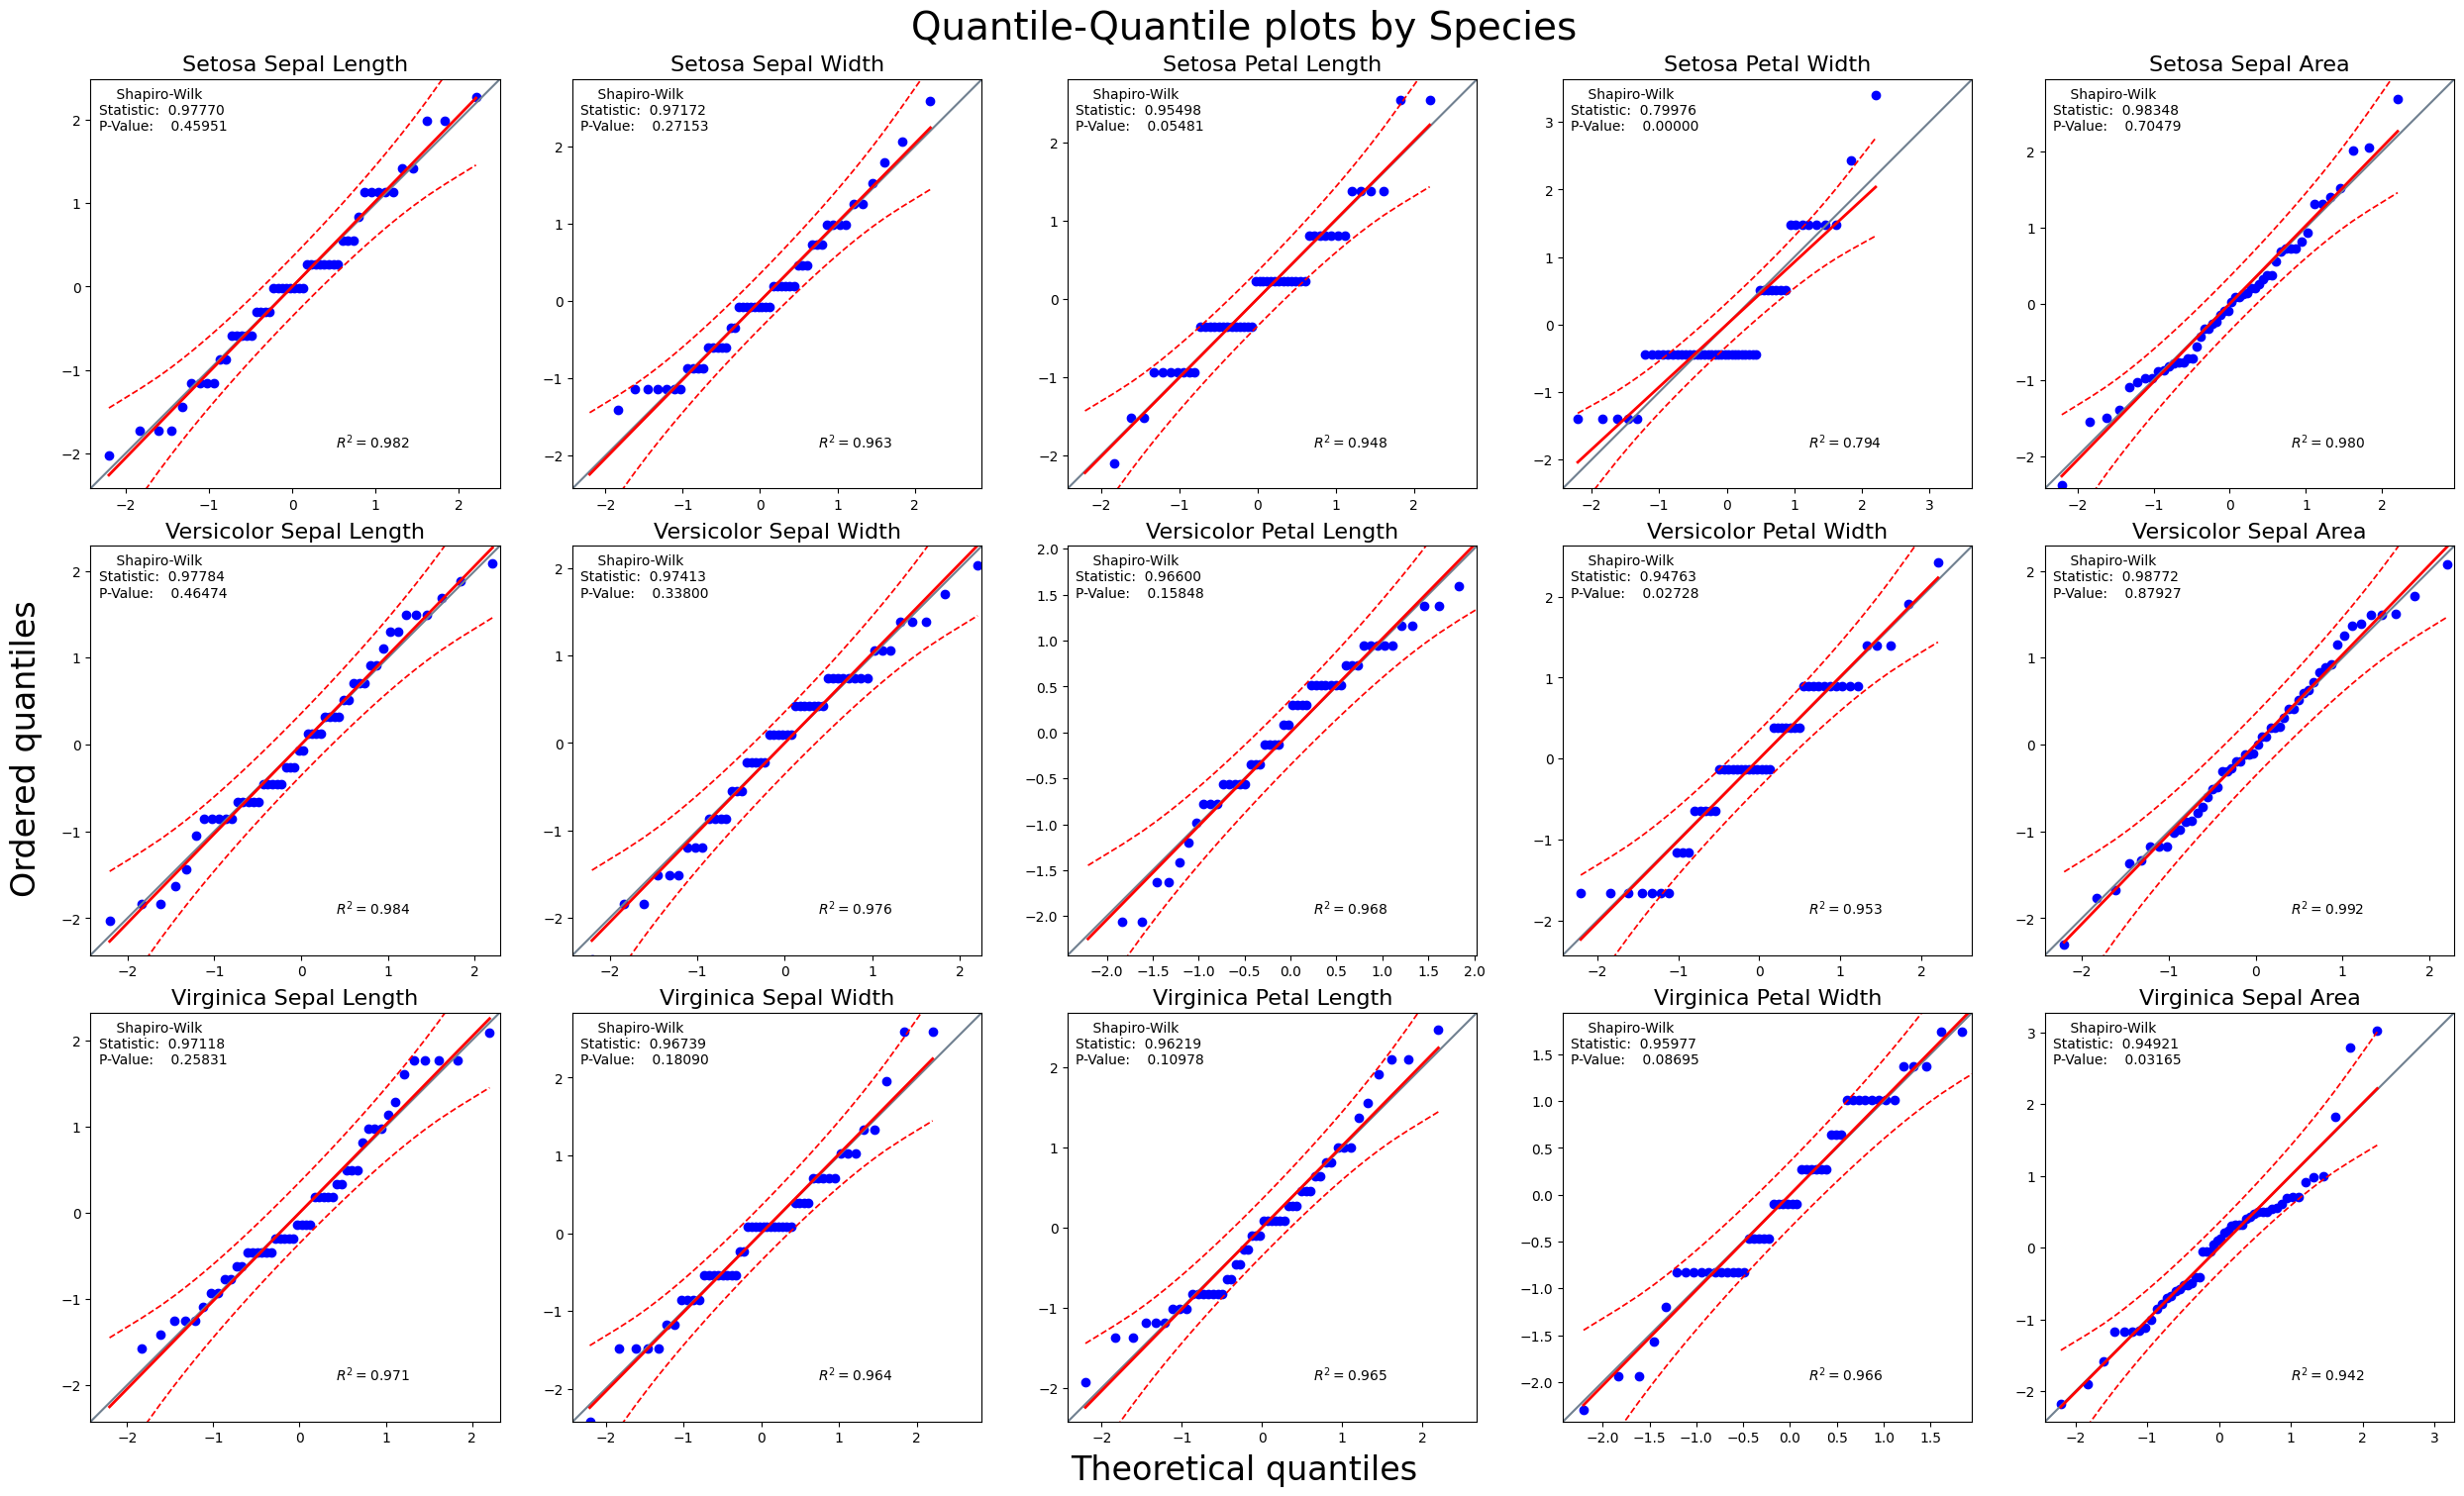

In [1239]:
stats_jordan.is_norm_small(iris_df, by = 'Species', ncol_fig = 5)
plt.show()

Looking over the Q-Q plots for the numeric variables by species we see clear horizontal stepping in all numeric variables of our original data set.  This horizontal stepping is caused by ties in the measurements, that is to say measurements that reoccur.
<br><br>
We have seen indications of ties in our data set through most of our initial data analysis, we will construct a table to observe how many distinct measurements occur more than twice for each of the numeric variables by species.

In [1240]:
iris_count = pd.DataFrame({
    col: iris_df.groupby('Species')[col].apply(lambda x: sum(x.value_counts() > 2))
    for col in iris_df.columns if col != 'Species'
})
iris_count = iris_count.style.set_caption(f"Ties greater than 2 (Total: {iris_count.values.sum().item()})")
iris_count

,Sepal Length,Sepal Width,Petal Length,Petal Width,Sepal Area
Species,,,,,
Setosa,8,8,5,4,1
Versicolor,8,10,8,7,0
Virginica,8,7,8,8,1


Overview of the table shows us that there are roughly eight distinct measurements for each numerical vs categorical data set that occur more than twice for a total of 91 for all the numerical vs categorical data sets.  

## Section 8. Initial Insights
Overall our discriptive data analysis revealed that the numerical columns of our given dataset show a rough normal trend though they have high occurances of ties.  We also observed trends between species with respect to several of the numerical variables namely the setosa species having overall smaller measurements compared to the other species with respect to sepal_length, petal_length, and petal_width.  This newly aquired information could prove invaluable for future analysis if we perform inferential statistical methods.